<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_Max_Heaps_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#the Heap of Life:
A journey from a basic algorithmic question to handling more complex scenarios with duplicates and larger sets, and then visualizing the results, provides a comprehensive understanding of max heaps and their properties.

##Problem:
Write a program to determine how many distinct ways there are to create a max heap from a list of N given integers.

For example, if N = 3, and our integers are [1, 2, 3], there are two ways, shown below.

```
  3      3
 / \    / \
1   2  2   1
```

##Solution:

In [1]:
from math import comb

def count_max_heaps(n):
    # Function to calculate the number of ways to form max heaps for a different number of distinct integers
    def count(n, dp, log2):
        # Base cases
        if n <= 1:
            return 1

        if dp[n] != -1:
            return dp[n]

        # The height of the heap for n distinct integers is log2(n)
        height = log2[n]

        # The maximum number of elements that can be present in the last level of the heap is 2^height
        max_last_level = 1 << height

        # The number of elements that are actually present in the last level of the heap for n distinct elements
        last_level_elements = n - ((1 << height) - 1)

        # If more than half of the last level of the heap is filled
        if last_level_elements >= (max_last_level // 2):
            left_tree_size = (1 << height) - 1
        else:
            left_tree_size = (1 << height) - 1 - ((max_last_level // 2) - last_level_elements)

        right_tree_size = n - 1 - left_tree_size

        # Recursively calculate the number of heaps for left and right subtrees
        left_subtree = count(left_tree_size, dp, log2)
        right_subtree = count(right_tree_size, dp, log2)

        # Calculate the number of distinct heaps using combinatorics
        dp[n] = comb(n - 1, left_tree_size) * left_subtree * right_subtree
        return dp[n]

    # Array to store the results of subproblems
    dp = [-1] * (n + 1)

    # Precompute the log values for each integer from 1 to n
    log2 = [0] * (n + 1)
    curr_log = -1
    curr_pow2 = 1

    # Precompute log2 values
    for i in range(1, n + 1):
        if curr_pow2 == i:
            curr_log += 1
            curr_pow2 *= 2
        log2[i] = curr_log

    # Count the number of max heaps for n distinct integers
    return count(n, dp, log2)

# Test with N = 3
count_max_heaps(3)


2

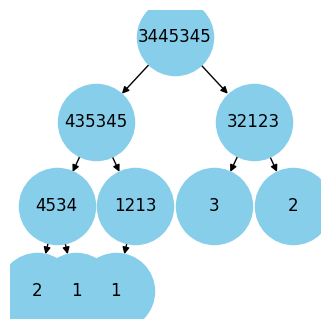

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_heap(heap, pos=None, ax=None):
    """Plot a binary heap using networkx and matplotlib."""
    if ax is None:
        ax = plt.gca()

    G = nx.DiGraph()

    # Add nodes and edges
    for i, value in enumerate(heap):
        G.add_node(i, label=str(value))
        if i != 0:  # skip the root node
            G.add_edge((i - 1) // 2, i)

    # Position nodes in binary tree layout if not provided
    if pos is None:
        pos = hierarchy_pos(G, 0)

    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color="skyblue", ax=ax)

def hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    """Create a layout for the binary tree."""
    pos = _hierarchy_pos(G, root, width=width, vert_gap=vert_gap, vert_loc=vert_loc, xcenter=xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
    """Recursively create a layout for the binary tree."""
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)
    if len(children) != 0:
        dx = width / 2
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                 vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos,
                                 parent=root)
    return pos

# Generate all possible max heaps for N=3 with integers [4534, 435345, 1213]
def generate_max_heaps(arr):
    if len(arr) <= 1:
        return [arr]

    max_element = max(arr)
    max_index = arr.index(max_element)

    # Swap the max element with the first element
    arr[0], arr[max_index] = arr[max_index], arr[0]

    # Recursively generate heaps for the rest of the array
    rest_heaps = generate_max_heaps(arr[1:])

    heaps = []
    for heap in rest_heaps:
        heaps.append([arr[0]] + heap)
        if len(heap) > 1:
            # Swap the children and generate another heap if it's distinct
            heap[0], heap[1] = heap[1], heap[0]
            if heap not in rest_heaps:
                heaps.append([arr[0]] + heap)

    return heaps

# Create plots for each distinct heap
arr = [1,1,2,2,3,4534, 435345, 1213,32123,3445345]
heaps = generate_max_heaps(arr)

# Plot the heaps
fig, axes = plt.subplots(nrows=1, ncols=len(heaps), figsize=(len(heaps)*4, 4))
if len(heaps) == 1:
    axes = [axes]
for ax, heap in zip(axes, heaps):
    plot_heap(heap, ax=ax)

plt.show()


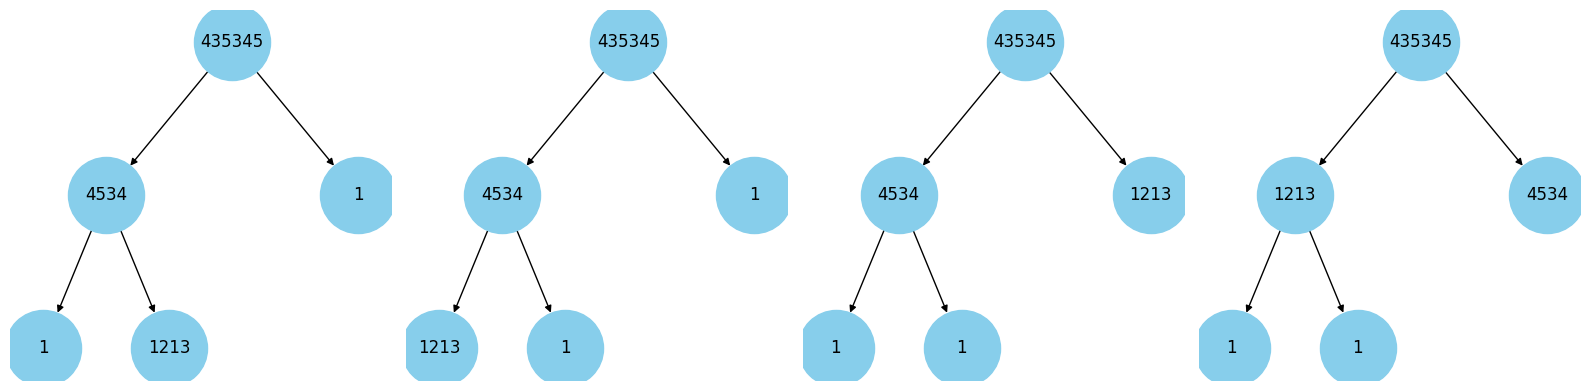

In [6]:
from itertools import permutations

def is_max_heap(arr):
    """Check if the given array represents a max heap."""
    n = len(arr)
    for i in range(n):
        left = 2 * i + 1
        right = 2 * i + 2
        if (left < n and arr[i] < arr[left]) or (right < n and arr[i] < arr[right]):
            return False
    return True

def generate_all_heaps(arr):
    """Generate all distinct max heaps from the given array."""
    all_heaps = set()
    for perm in permutations(arr):
        if is_max_heap(perm):
            all_heaps.add(perm)
    return list(all_heaps)

# Generate all distinct max heaps for the example with possible duplicates
arr_with_duplicates = [1,1,4534, 435345, 1213]
distinct_heaps = generate_all_heaps(arr_with_duplicates)

# Plot each distinct heap
fig, axes = plt.subplots(nrows=1, ncols=len(distinct_heaps), figsize=(len(distinct_heaps) * 4, 4))
if len(distinct_heaps) == 1:
    axes = [axes]
for ax, heap in zip(axes, distinct_heaps):
    plot_heap(heap, ax=ax)

plt.tight_layout()
plt.show()


In [7]:
from itertools import combinations

def unique_combinations(arr, n):
    """Generate all unique combinations of n elements from the array."""
    unique_comb = set(combinations(arr, n))
    return list(unique_comb)

# Generate all unique combinations of 3 elements from the longer list
long_list = [1, 2, 3, 3, 3, 4, 5, 5, 6]
unique_combinations_3 = unique_combinations(long_list, 3)

# For each unique combination, generate all distinct max heaps
all_heaps = []
for comb in unique_combinations_3:
    heaps_for_comb = generate_all_heaps(comb)
    all_heaps.extend(heaps_for_comb)

# Count of distinct heaps
len(all_heaps)


57

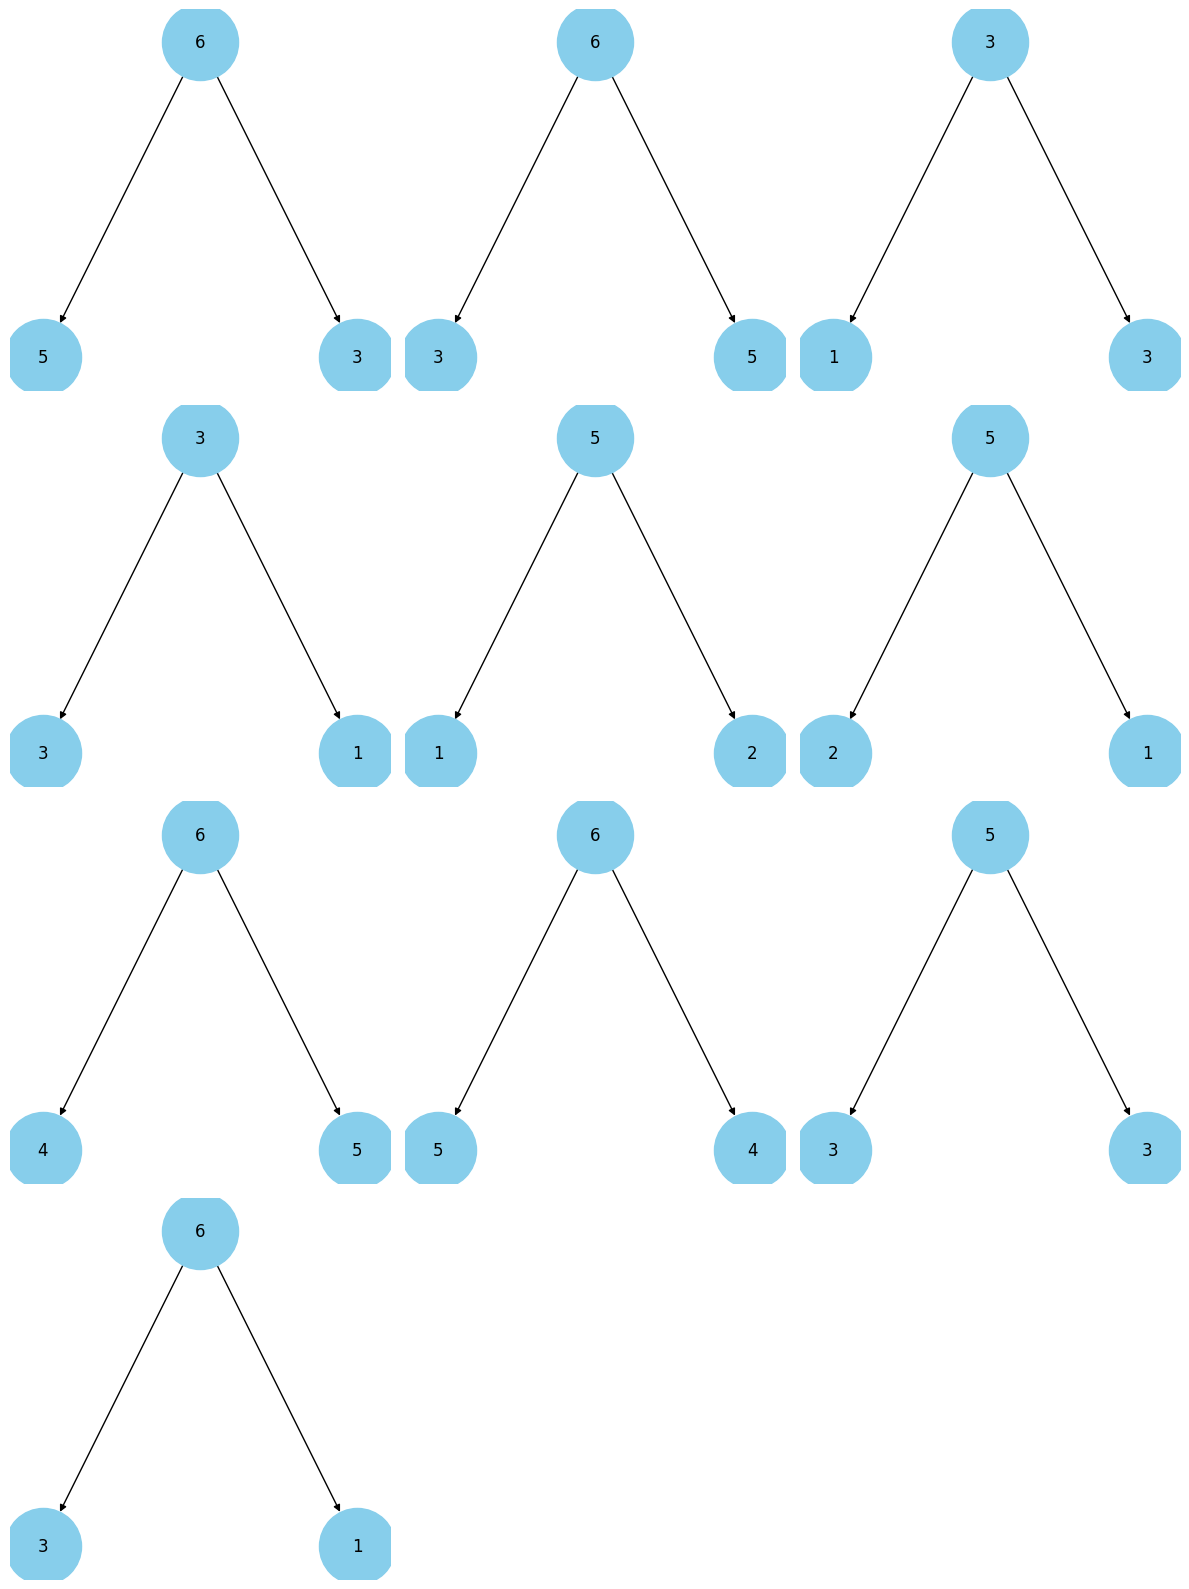

In [8]:
# Plotting the heaps
# Due to the potentially large number of heaps, let's plot a subset of them for clarity

# Select a subset of heaps to display
subset_heaps = all_heaps[:10]  # Adjust this number to display more or fewer heaps

# Determine the number of rows and columns for the subplot
n_heaps = len(subset_heaps)
cols = 3  # Number of columns in the subplot
rows = n_heaps // cols + (n_heaps % cols > 0)  # Number of rows, adjusted for the number of heaps

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each heap in the subplot
for i, heap in enumerate(subset_heaps):
    plot_heap(heap, ax=axes[i])

# Turn off any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


##What Just Happened:
A summary of the algorithms and process used to arrive at a solutio. The solution was the journey, not the destination, grasshopper:

1. **Initial Problem Statement**: The task was to determine how many distinct max heaps can be created from a list of N given integers. We initially considered a simple case with N = 3 and distinct integers.

2. **Max Heap Basics**: A max heap is a binary tree where each parent node is greater than or equal to its children. The largest element must be the root, and the heap property must be maintained throughout the tree.

3. **Counting Distinct Max Heaps**: The first step was writing a program to count the number of distinct max heaps for N distinct integers. This algorithm didn't consider the specific values of the integers, just their count. It used dynamic programming and combinatorics, considering the structure of the heap and the distribution of elements across levels.

4. **Visualizing Heaps**: Next, we focused on visualizing these heaps. Using `matplotlib` and `networkx`, we created a function to plot a binary tree representing the heap. This visualization helped in understanding how the integers are arranged in a heap.

5. **Handling Duplicates**: We then explored scenarios where the list of integers had duplicates, requiring a modification of the algorithm. The revised approach involved checking each permutation of the integers to see if it formed a valid max heap.

6. **Extended Problem**: The problem was further extended to consider a longer list of integers (more than N) with duplicates, from which we had to select N integers and form max heaps. This introduced two steps: generating all unique combinations of N integers from the list and then generating heaps for each combination.

7. **Subset Visualization**: Given the large number of possible heaps, especially with duplicates and larger lists, we selected a subset of the heaps for visualization to maintain clarity and manageability.

8. **Conclusion**: Through this process, we explored various aspects of heap generation and visualization, including handling duplicates, managing larger sets of integers, and dynamically generating and plotting binary trees to represent heaps.

This journey from a basic algorithmic question to handling more complex scenarios with duplicates and larger sets, and then visualizing the results, provided a comprehensive understanding of max heaps and their properties.

##Further Perambulations on the Heap of Life:
There are several interesting ways we can extend our exploration of heaps. Here are a few suggestions:

1. **Heap Operations Visualization**: Beyond just creating heaps, you could visualize operations on heaps, such as insertion, deletion (particularly deletion of the root in a max heap), and heapify (transforming an arbitrary array into a heap). This would provide a deeper understanding of how heaps maintain their properties during dynamic operations.

2. **Comparing Max and Min Heaps**: Implement and visualize both max and min heaps. This contrast can help in understanding the duality of these data structures. You could use the same set of numbers to create both a max heap and a min heap and visualize them side by side.

3. **Heap Sort Visualization**: Implement heap sort algorithm and visualize the sorting process step by step using a heap. This is a practical application of heaps in sorting algorithms and can be very educational to see in action.

4. **Priority Queue Implementation**: Use a heap to implement a priority queue and then visualize the process of adding and removing elements based on priority. This could be further extended to real-world scenarios like task scheduling, simulating a line at a service desk, etc.

5. **Balanced Heap Construction**: Explore the creation of balanced heaps where the difference in height between the left and right subtrees for every node is at most one. This adds an additional layer of complexity to heap construction.

6. **Interactive Heap Simulator**: Create an interactive tool where you can add and remove elements from a heap and see the changes in real-time. This could be a web-based tool or a simple GUI application.

7. **Analyzing Heap Properties**: Conduct a detailed analysis of heap properties, like time complexity of various operations, space complexity, and how these properties change with different types of heaps (binary, ternary, etc.).

8. **Exploring Different Types of Heaps**: Beyond binary heaps, explore ternary heaps, Fibonacci heaps, Binomial heaps, etc. Understanding the differences and why one might be chosen over another in different scenarios can be enlightening.

9. **Real-world Applications**: Discuss and simulate real-world applications of heaps, such as Dijkstra's algorithm for shortest path finding in graphs, Huffman coding for data compression, and managing bandwidth in networking.

Each of these extensions can offer deeper insights into heap structures and their applications in computer science and real-world problem-solving.